
Name : GP regression
Objective : -19.0325451084
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  sum.Mat52.variance       |     0.336118363556  |      +ve      |        
  sum.Mat52.lengthscale    |               (2,)  |      +ve      |        
  sum.poly.variance        |   0.00681427019565  |      +ve      |        
  sum.poly.scale           |  0.000380787372714  |      +ve      |        
  sum.poly.bias            |   0.00340563204026  |      +ve      |        
  Gaussian_noise.variance  |   0.00281065379851  |      +ve      |        


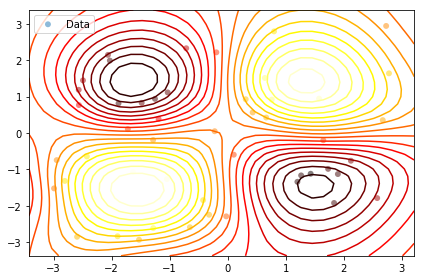

In [6]:
import pylab as pb
pb.ion()
import numpy as np
import GPy

# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.Poly(1)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# contrain all parameters to be positive
m.constrain_positive('')

# optimize and plot
m.optimize('tnc', max_f_eval = 1000)
m.plot()
print(m)

